# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

In [ ]:
"""
#準備：https://qiita.com/yamaru/items/822af1f7f77666381e20
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt
"""

--2022-02-25 03:52:20--  https://drive.google.com/uc?export=download&confirm=&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving drive.google.com (drive.google.com)... 173.194.218.102, 173.194.218.113, 173.194.218.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors-     [ <=>                ]   1.93K  --.-KB/s    in 0s      

2022-02-25 03:52:20 (19.1 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1978]



In [20]:
#the above downloads keeps failing, so i've downloaded the file onto my google drive and mounted it @/content/drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/u/1/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [21]:
"""use gensim
keyedVectors module allows for quick load of models, but cannot train further. https://radimrehurek.com/gensim/models/keyedvectors.html

The vectors can also be instantiated from an existing file on disk in the original Google’s word2vec C format as a KeyedVectors instance
>>>from gensim.test.utils import datapath
>>>wv_from_text = KeyedVectors.load_word2vec_format(datapath('word2vec_pre_kv_c'), binary=False)  # C text format
>>>wv_from_bin = KeyedVectors.load_word2vec_format(datapath("euclidean_vectors.bin"), binary=True)  # C bin format

*GoogleNews-vectors-negative300.bin.gz is in bin(binary) format, so use the latter code
"""

from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('./drive/MyDrive/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
model['United_States'][:100]
#100次元まで表示

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．



In [ ]:
#models.KeyedVectors.similarity(w1,w2) https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.similarity

model.similarity('United_States', 'U.S.')

0.73107743

## 62. 類似度の高い単語10件

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ

In [ ]:
#most_similar: https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
#most_similar: most_similar([postive terms list], [negative term list], ... other options)
model.most_similar(positive=['Spain','Athens'],negative=['Madrid'], topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

## 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('./drive/MyDrive/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
## 評価データダウンロード
!wget http://download.tensorflow.org/data/questions-words.txt

--2022-05-03 07:42:23--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.141.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.002s  

2022-05-03 07:42:23 (265 MB/s) - ‘questions-words.txt’ saved [603955/603955]



このデータは、(Athens-Greece, Tokyo-Japan)のように、意味的アナロジーを評価するための組と、(walk-walks, write-writes)のように文法的アナロジーを評価する組が含まれる．

In [ ]:
!head questions-words.txt -n 5

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany


In [ ]:
from tqdm import tqdm

file1 = 'questions-words.txt'
file2 = 'questions-words_sim.txt'

with open(file1,'r') as f1, open(file2,'w') as f2:
  for line in tqdm(f1):
    line = line.split()
    if line[0]==':':
      category = line[1]
    else:
      simW, simV = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]#crashes
      f2.write(' '.join([category] + line + [simW , str(simV),"\n"]))


19558it [2:05:18,  2.60it/s]


## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:
'''
questions-wordsのデータセットには大きく２種類のカテゴリがある：
意味的アナロジー（capital-common-countryなど:Athens Greece Hanoi Vietnam）
文法的アナロジー（gram1-adjective-to-adverbなど:happy happily serious seriously）
'''
syn_all = int() #num of syntactic analogies
syn_cor = int() #num of correct syntactic analogies
sem_all = int()
sem_cor = int()

with open('questions-words_sim.txt','r') as f:
  for line in f:
    line = line.split()
    if "gram" in line[0]:#syntactic analogy
      syn_all += 1
      if line[4]==line[5]:
        syn_cor += 1
    else:
      sem_all += 1
      if line[4]==line[5]:
        sem_cor += 1

print("semantic analogy accuracy: {}".format(sem_cor/sem_all))
print("syntactic analogy accuracy: {}".format(syn_cor/syn_all))       

semantic analogy accuracy: 0.7308602999210734
syntactic analogy accuracy: 0.7400468384074942


## 66. WordSimilarity-353での評価
[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('./drive/MyDrive/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2022-05-03 04:49:41--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2022-05-03 04:49:41--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.07s   

2022-05-03 04:49:42 (320 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  

In [ ]:
!head  './combined.csv' -n 10

Word 1,Word 2,Human (mean)
love,sex,6.77
tiger,cat,7.35
tiger,tiger,10.00
book,paper,7.46
computer,keyboard,7.62
computer,internet,7.58
plane,car,5.77
train,car,6.31
telephone,communication,7.50


In [ ]:
from collections import defaultdict
humanDict= defaultdict()
calcDict = defaultdict()

with open('combined.csv', 'r') as f:
  for line in f:
    line = line.strip('\n').split(',')
    if line[2]!='Human (mean)':
      #単語と人間/単語ベクトルによる類似度をそれぞれdict型に記憶
      humanDict.update({line[0]+','+line[1] : float(line[2])})
      calcDict.update({line[0]+','+line[1] : model.similarity(line[0],line[1])})
      
#--dictのvalue(float型)で降順にsortし、ランキング(int型)を与える: 出力はlist型--#
import itertools
humanRanking= list()
calcRanking = list()
count=1
a = sorted(humanDict.items(), key=lambda item: item[1], reverse=True)
b = sorted(calcDict.items(), key=lambda item: item[1], reverse=True)
for (pa, pb) in zip(a, b):
  humanRanking.append((pa[0],count))
  calcRanking.append((pb[0],count))
  count+=1
#--#--#

#--単語順にsortし直し、ランキングの数字だけのリストに整理する--#
humanRanking = sorted(humanRanking, key=lambda item: item[0])
calcRanking = sorted(calcRanking, key=lambda item: item[0])
for (ra, rb) in zip(humanRanking, calcRanking):
  humanRanking.insert(humanRanking.index(ra), ra[1])
  humanRanking.remove(ra)
  calcRanking.insert(calcRanking.index(rb), rb[1])
  calcRanking.remove(rb)
#--#--#

'''scipy.stats.spearmanr: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html
'''
from scipy.stats import spearmanr
correlation, pvalue = spearmanr(humanRanking, calcRanking)
correlation

0.6977491740239614

## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format('./drive/MyDrive/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [2]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2022-05-06 06:35:26--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.137.128, 2607:f8b0:4023:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.137.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.002s  

2022-05-06 06:35:26 (326 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [35]:
#国名抽出: questions-words.txt内のcapital-worldから抽出
flag=0
countries = set()
with open('questions-words.txt', 'r') as f:
  for line in f:
    line = line.split()
    if line[1] == 'capital-world':
      flag=1
      continue
    elif line[0]==':':
      flag=0
      continue
    elif flag==1:
      countries.add(line[1])
countries = list(countries)

country_vec = [ model[country] for country in countries ]

In [36]:
#sklearn.cluster.KMeans https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5, random_state=0).fit(country_vec) #再現性のためにrandom_stateには整数を与える

In [50]:
for vec in kmeans.cluster_centers_: #それぞれのclusterの中央座標
  print(model.most_similar(positive=[vec], topn=1)) #その座標に一番近い単語
  print(len(vec))

for i in range(5):
  print(i)
  cluster = np.where(kmeans.labels_==i)[0] #それぞれのwvがどのclusterに属するか：今回は5コに分けてるから0-4のindexが割り振られてる
  for index in cluster:
    print(countries[index],end=',')
  print()

[('Zambia', 0.827055811882019)]
300
[('Honduras', 0.7929350137710571)]
300
[('Bulgaria', 0.8589163422584534)]
300
[('Uzbekistan', 0.7497273087501526)]
300
[('Sweden', 0.8012604713439941)]
300
0
Gambia,Sudan,Zambia,Mozambique,Guinea,Gabon,Madagascar,Mali,Mauritania,Zimbabwe,Angola,Tunisia,Nigeria,Ghana,Algeria,Liberia,Senegal,Uganda,Kenya,Rwanda,Somalia,Namibia,Eritrea,Botswana,Niger,Burundi,Malawi,
1
Honduras,Fiji,Venezuela,Cuba,Guyana,Suriname,Nicaragua,Ecuador,Taiwan,Dominica,Peru,Philippines,Chile,Belize,Bahamas,Jamaica,Samoa,Tuvalu,Uruguay,
2
Moldova,Hungary,Slovenia,Malta,Lithuania,Turkey,Belarus,Latvia,Poland,Romania,Russia,Greece,Armenia,Slovakia,Macedonia,Bulgaria,Albania,Ukraine,Estonia,Montenegro,Kazakhstan,Azerbaijan,Cyprus,Croatia,Serbia,Georgia,
3
Laos,China,Iraq,Pakistan,Bangladesh,Nepal,Egypt,Iran,Uzbekistan,Turkmenistan,Lebanon,Qatar,Afghanistan,Tajikistan,Morocco,Libya,Kyrgyzstan,Vietnam,Bahrain,Thailand,Indonesia,Syria,Jordan,Bhutan,Oman,
4
Japan,Ireland,Italy,Belgium

## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

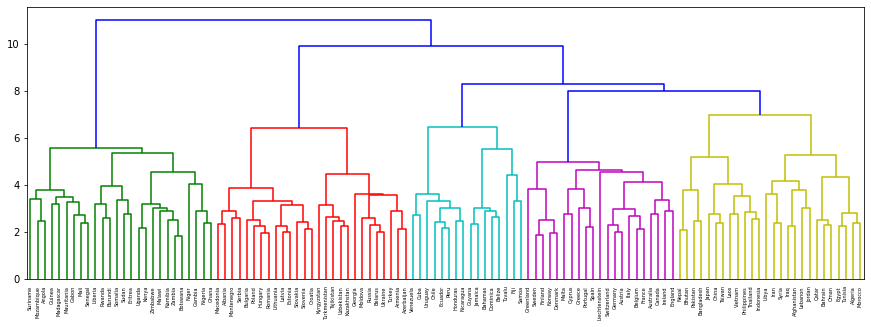

In [49]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(country_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()


## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

In [66]:
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(country_vec)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8928233840825666


In [54]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 0.3213653564453125 seconds


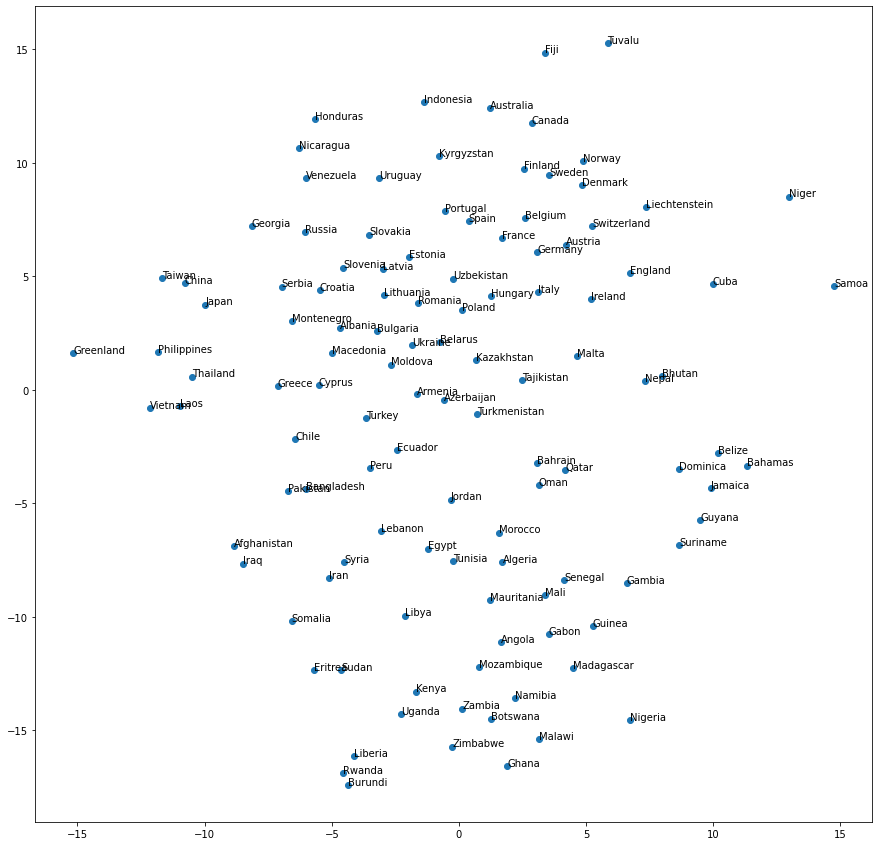

In [65]:
x = tsne_pca_results[:,0]
y = tsne_pca_results[:,1]

plt.figure(figsize=(15,15))
plt.scatter(x, y)
for i, txt in enumerate(countries):
  plt.annotate(txt, (x[i], y[i]))
plt.show()